In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
cva_df = pd.read_csv('covid19vaccinesadministeredbydemographics.csv')
cva_df.head(20)

,demographic_category,demographic_value,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,booster_recip_count,cumulative_booster_recip_count
0,Age Group,18-49,2022-03-08,8219,33212597,5311,19574942,2649,12321983,242,1301298,1475,1766522,1455,13112504,1624,14879026,5061,6120140
1,Age Group,50-64,2022-03-08,2937,16332473,1651,8659419,1190,6919606,81,738914,365,665935,344,6199910,397,6865844,1995,3745822
2,Age Group,65+,2022-03-08,1951,14770183,973,6934877,907,7574521,28,243663,194,603187,204,5396702,202,5999889,1117,3796654
3,Age Group,12-17,2022-03-08,1919,5213509,1905,5192333,1,10648,0,1299,346,259772,509,2075192,348,2334961,1050,570676
4,Age Group,5-11,2022-03-08,3298,2484587,67,38657,0,1696,0,249,1353,225117,1933,1120692,1353,1345808,7,1258
5,Age Group,Unknown Agegroup,2022-03-08,3,6470,0,2219,1,2679,0,401,3,3589,0,1491,3,5080,0,13
6,Gender,Female,2022-03-08,9813,37887382,5483,21468569,2493,14165854,166,1006525,1888,1757826,2249,14515846,1975,16273672,5203,7736487
7,Gender,Male,2022-03-08,8484,33993758,4402,18866617,2250,12604966,185,1270142,1828,1737799,2192,13337976,1932,15075775,4022,6487429
8,Gender,Unknown/undifferentiated,2022-03-08,30,138679,22,67261,5,60313,0,9157,20,28497,4,52668,20,81165,5,10647
9,Race/Ethnicity,White,2022-03-08,3835,25171754,2025,13509383,1189,10251771,101,797523,535,891671,729,9559410,578,10451081,2136,5696314


In [3]:
cva_df.columns

Index(['demographic_category', 'demographic_value', 'administered_date',
       'total_doses', 'cumulative_total_doses', 'pfizer_doses',
       'cumulative_pfizer_doses', 'moderna_doses', 'cumulative_moderna_doses',
       'jj_doses', 'cumulative_jj_doses', 'partially_vaccinated',
       'total_partially_vaccinated', 'fully_vaccinated',
       'cumulative_fully_vaccinated', 'at_least_one_dose',
       'cumulative_at_least_one_dose', 'booster_recip_count',
       'cumulative_booster_recip_count'],
      dtype='object')

In [4]:
cva_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9617 entries, 0 to 9616
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   demographic_category            9617 non-null   object
 1   demographic_value               9617 non-null   object
 2   administered_date               9617 non-null   object
 3   total_doses                     9617 non-null   int64 
 4   cumulative_total_doses          9617 non-null   int64 
 5   pfizer_doses                    9617 non-null   int64 
 6   cumulative_pfizer_doses         9617 non-null   int64 
 7   moderna_doses                   9617 non-null   int64 
 8   cumulative_moderna_doses        9617 non-null   int64 
 9   jj_doses                        9617 non-null   int64 
 10  cumulative_jj_doses             9617 non-null   int64 
 11  partially_vaccinated            9617 non-null   int64 
 12  total_partially_vaccinated      9617 non-null   

#### UNIVARIATE ANALYSIS

In [5]:
# Demographic_category
cva_df['demographic_category'].value_counts()

Race/Ethnicity    4834
Age Group         3147
Gender            1636
Name: demographic_category, dtype: int64

In [6]:
# demographic_value
# find the mean of this column later
cva_df['demographic_value'].value_counts()

Female                                       589
18-49                                        588
Male                                         588
White                                        587
65+                                          586
50-64                                        580
Latino                                       580
Asian                                        565
Unknown                                      560
Other Race                                   557
Black or African American                    534
Multiracial                                  504
12-17                                        500
Native Hawaiian or Other Pacific Islander    478
American Indian or Alaska Native             469
Unknown/undifferentiated                     459
5-11                                         453
Unknown Agegroup                             440
Name: demographic_value, dtype: int64

In [7]:
# administered_date

cva_df['administered_date'].value_counts()

2022-03-08    18
2021-05-17    18
2021-05-06    18
2021-05-07    18
2021-05-08    18
              ..
2020-10-25     6
2020-09-27     4
2020-09-06     3
2020-03-03     3
2020-01-05     3
Name: administered_date, Length: 592, dtype: int64

In [8]:
# Adding new column for month 
cva_df['Administered Month'] = pd.DatetimeIndex(cva_df['administered_date']).month


In [9]:
# Adding new column for year
cva_df['Administered Year'] = pd.DatetimeIndex(cva_df['administered_date']).year


In [10]:
cva_df.head()
print(cva_df.iloc[1200:1220])

     demographic_category                          demographic_value  \
1200       Race/Ethnicity                                    Unknown   
1201       Race/Ethnicity                                Multiracial   
1202       Race/Ethnicity  Native Hawaiian or Other Pacific Islander   
1203       Race/Ethnicity           American Indian or Alaska Native   
1204            Age Group                                      18-49   
1205            Age Group                                      50-64   
1206            Age Group                                        65+   
1207            Age Group                                      12-17   
1208            Age Group                                       5-11   
1209            Age Group                           Unknown Agegroup   
1210               Gender                                     Female   
1211               Gender                                       Male   
1212               Gender                   Unknown/undifferenti

In [11]:
cva_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9617 entries, 0 to 9616
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   demographic_category            9617 non-null   object
 1   demographic_value               9617 non-null   object
 2   administered_date               9617 non-null   object
 3   total_doses                     9617 non-null   int64 
 4   cumulative_total_doses          9617 non-null   int64 
 5   pfizer_doses                    9617 non-null   int64 
 6   cumulative_pfizer_doses         9617 non-null   int64 
 7   moderna_doses                   9617 non-null   int64 
 8   cumulative_moderna_doses        9617 non-null   int64 
 9   jj_doses                        9617 non-null   int64 
 10  cumulative_jj_doses             9617 non-null   int64 
 11  partially_vaccinated            9617 non-null   int64 
 12  total_partially_vaccinated      9617 non-null   

In [12]:
cva_df['total_doses'].value_counts()

1        350
2        177
3        172
4        129
6        122
        ... 
29377      1
41278      1
50283      1
57473      1
246        1
Name: total_doses, Length: 6279, dtype: int64

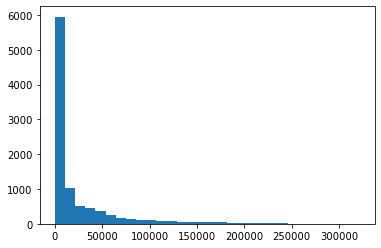

In [13]:
plt.hist(cva_df['total_doses'], bins=30)
plt.show()

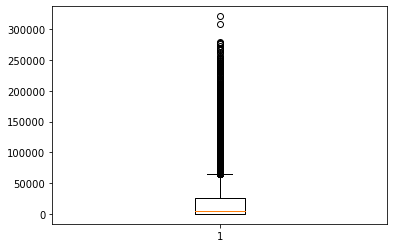

In [14]:
plt.boxplot(cva_df['total_doses'])
plt.show()

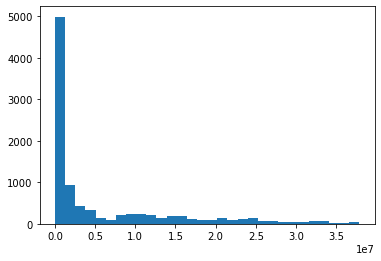

In [15]:
plt.hist(cva_df['cumulative_total_doses'], bins=30)
plt.show()

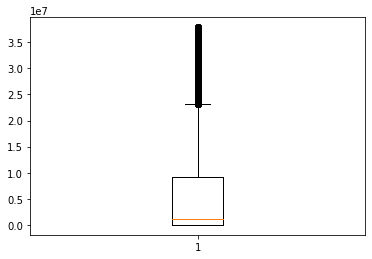

In [16]:
plt.boxplot(cva_df['cumulative_total_doses'])
plt.show()

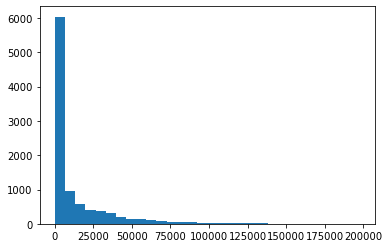

In [17]:
plt.hist(cva_df['pfizer_doses'], bins=30)
plt.show()

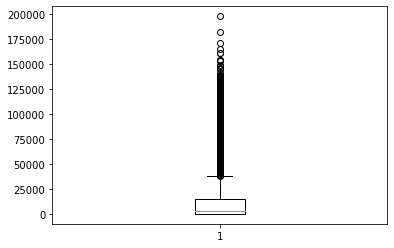

In [18]:
plt.boxplot(cva_df['pfizer_doses'])
plt.show()

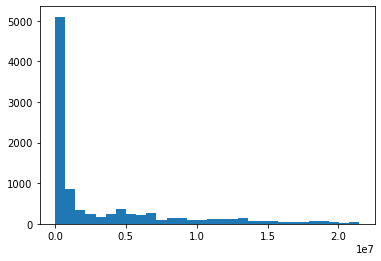

In [19]:
plt.hist(cva_df['cumulative_pfizer_doses'], bins=30)
plt.show()

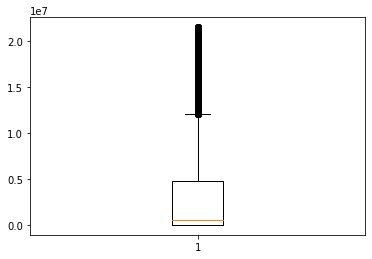

In [20]:
plt.boxplot(cva_df['cumulative_pfizer_doses'])
plt.show()

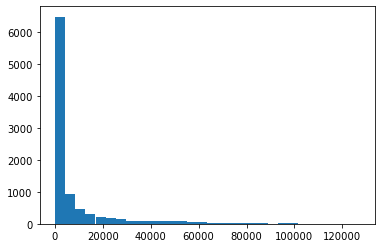

In [21]:
plt.hist(cva_df['moderna_doses'], bins=30)
plt.show()

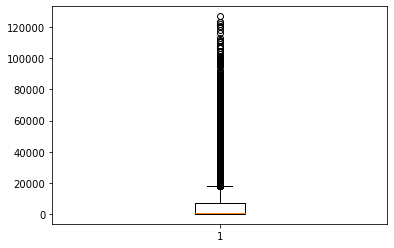

In [22]:
plt.boxplot(cva_df['moderna_doses'])
plt.show()

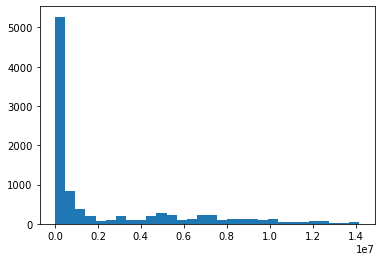

In [23]:
plt.hist(cva_df['cumulative_moderna_doses'], bins=30)
plt.show()

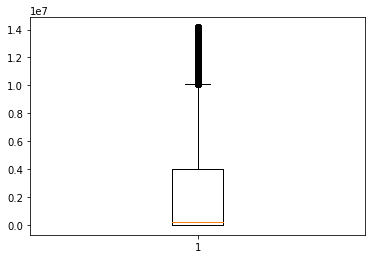

In [24]:
plt.boxplot(cva_df['cumulative_moderna_doses'])
plt.show()

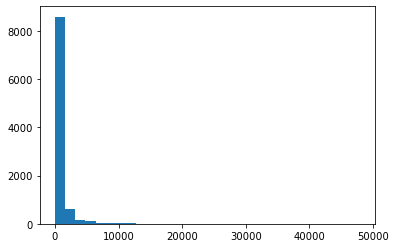

In [25]:
plt.hist(cva_df['jj_doses'], bins=30)
plt.show()

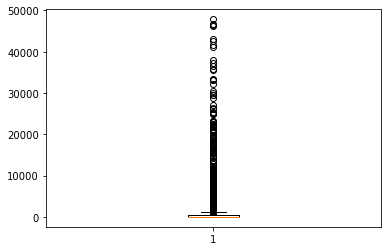

In [26]:
plt.boxplot(cva_df['jj_doses'])
plt.show()

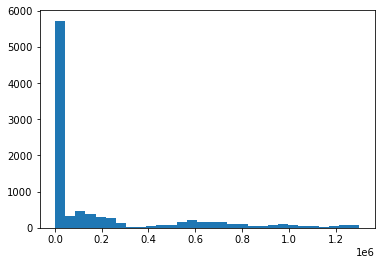

In [27]:
plt.hist(cva_df['cumulative_jj_doses'], bins=30)
plt.show()

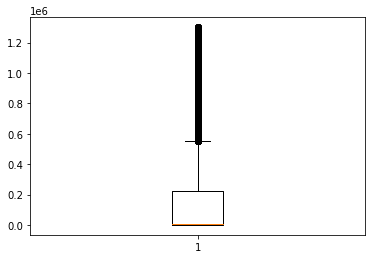

In [28]:
plt.boxplot(cva_df['cumulative_jj_doses'])
plt.show()

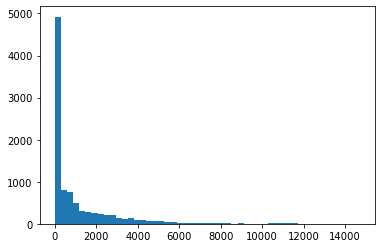

In [29]:
plt.hist(cva_df['partially_vaccinated'], bins=50)
plt.show()

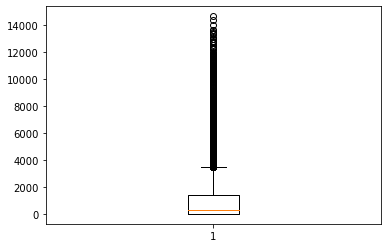

In [30]:
plt.boxplot(cva_df['partially_vaccinated'])
plt.show()

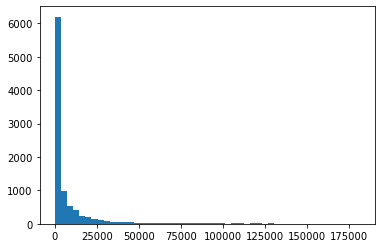

In [94]:
plt.hist(cva_df['fully_vaccinated'], bins=50)
plt.show()

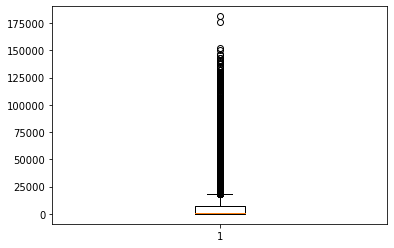

In [95]:
plt.boxplot(cva_df['fully_vaccinated'])
plt.show()

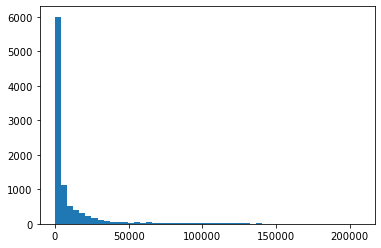

In [96]:
plt.hist(cva_df['at_least_one_dose'], bins=50)
plt.show()

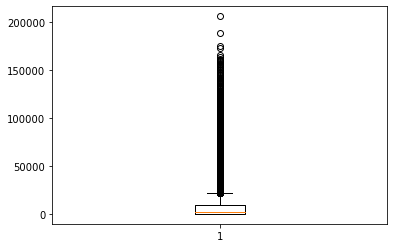

In [97]:
plt.boxplot(cva_df['at_least_one_dose'])
plt.show()

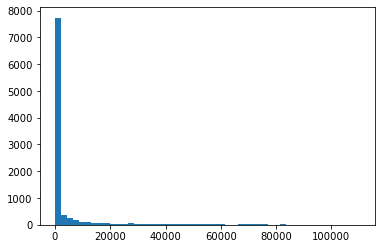

In [98]:
plt.hist(cva_df['booster_recip_count'], bins=50)
plt.show()

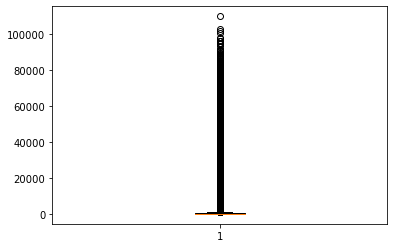

In [99]:
plt.boxplot(cva_df['booster_recip_count'])
plt.show()

In [31]:
cva_df.columns

Index(['demographic_category', 'demographic_value', 'administered_date',
       'total_doses', 'cumulative_total_doses', 'pfizer_doses',
       'cumulative_pfizer_doses', 'moderna_doses', 'cumulative_moderna_doses',
       'jj_doses', 'cumulative_jj_doses', 'partially_vaccinated',
       'total_partially_vaccinated', 'fully_vaccinated',
       'cumulative_fully_vaccinated', 'at_least_one_dose',
       'cumulative_at_least_one_dose', 'booster_recip_count',
       'cumulative_booster_recip_count', 'Administered Month',
       'Administered Year'],
      dtype='object')

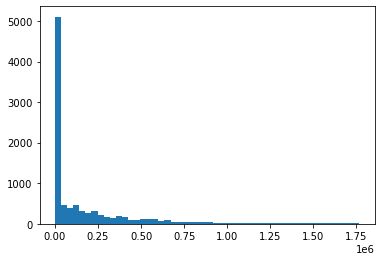

In [32]:
plt.hist(cva_df['total_partially_vaccinated'], bins=50)
plt.show()

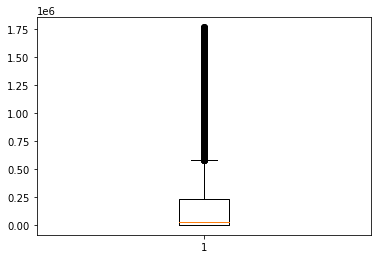

In [33]:
plt.boxplot(cva_df['total_partially_vaccinated'])
plt.show()

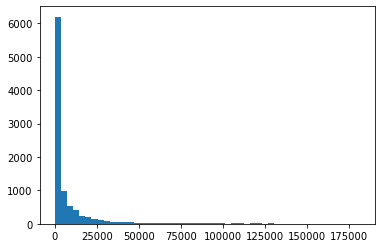

In [34]:
plt.hist(cva_df['fully_vaccinated'], bins=50)
plt.show()

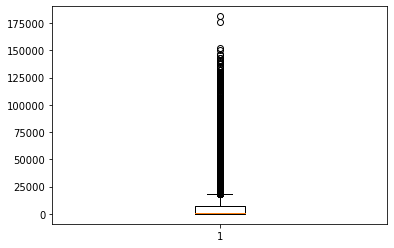

In [35]:
plt.boxplot(cva_df['fully_vaccinated'])
plt.show()

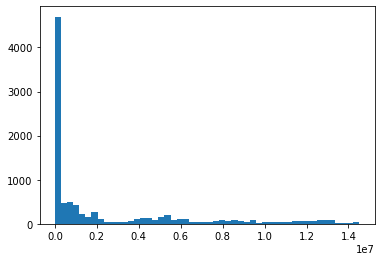

In [36]:
plt.hist(cva_df['cumulative_fully_vaccinated'], bins=50)
plt.show()

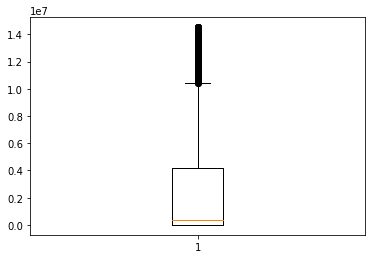

In [37]:
plt.boxplot(cva_df['cumulative_fully_vaccinated'])
plt.show()

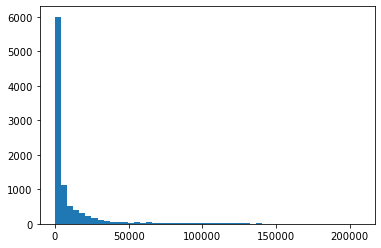

In [38]:
plt.hist(cva_df['at_least_one_dose'], bins=50)
plt.show()

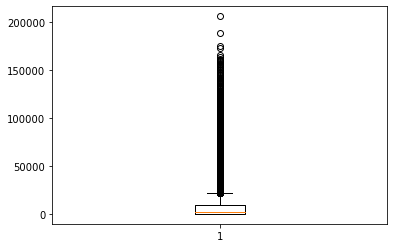

In [39]:
plt.boxplot(cva_df['at_least_one_dose'])
plt.show()

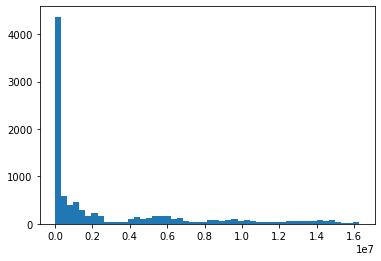

In [40]:
plt.hist(cva_df['cumulative_at_least_one_dose'], bins=50)
plt.show()

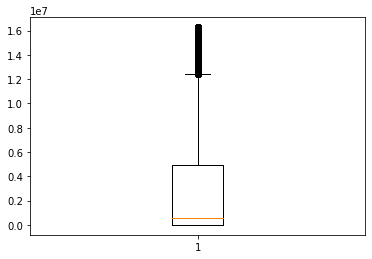

In [41]:
plt.boxplot(cva_df['cumulative_at_least_one_dose'])
plt.show()

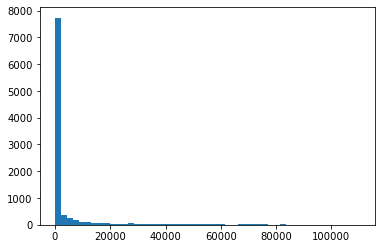

In [42]:
plt.hist(cva_df['booster_recip_count'], bins=50)
plt.show()

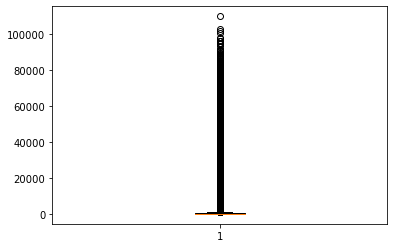

In [43]:
plt.boxplot(cva_df['booster_recip_count'])
plt.show()

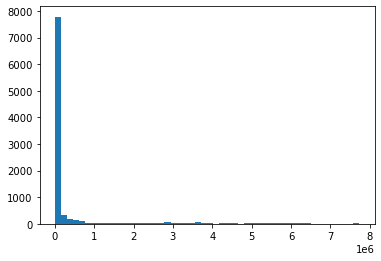

In [44]:
plt.hist(cva_df['cumulative_booster_recip_count'], bins=50)
plt.show()

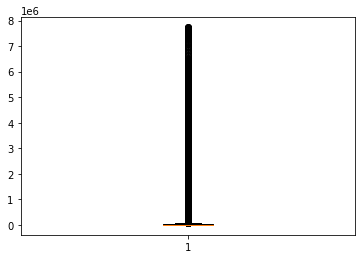

In [45]:
plt.boxplot(cva_df['cumulative_booster_recip_count'])
plt.show()

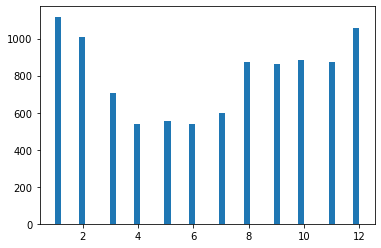

In [46]:
plt.hist(cva_df['Administered Month'], bins=50)
plt.show()

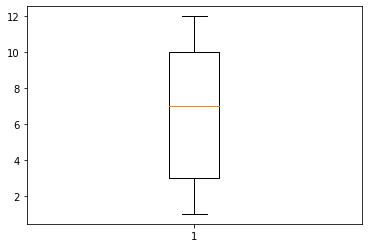

In [47]:
plt.boxplot(cva_df['Administered Month'])
plt.show()

In [48]:
cva_df['Administered Month'].value_counts()

1     1118
12    1059
2     1007
10     884
8      876
11     873
9      864
3      705
7      597
5      557
4      540
6      537
Name: Administered Month, dtype: int64

In [49]:
cva_df['Administered Year'].value_counts()

2021    6555
2020    1858
2022    1204
Name: Administered Year, dtype: int64

In [50]:
cva_df.columns

Index(['demographic_category', 'demographic_value', 'administered_date',
       'total_doses', 'cumulative_total_doses', 'pfizer_doses',
       'cumulative_pfizer_doses', 'moderna_doses', 'cumulative_moderna_doses',
       'jj_doses', 'cumulative_jj_doses', 'partially_vaccinated',
       'total_partially_vaccinated', 'fully_vaccinated',
       'cumulative_fully_vaccinated', 'at_least_one_dose',
       'cumulative_at_least_one_dose', 'booster_recip_count',
       'cumulative_booster_recip_count', 'Administered Month',
       'Administered Year'],
      dtype='object')

#### Count of total dose per demographic value

<AxesSubplot:ylabel='total_doses'>

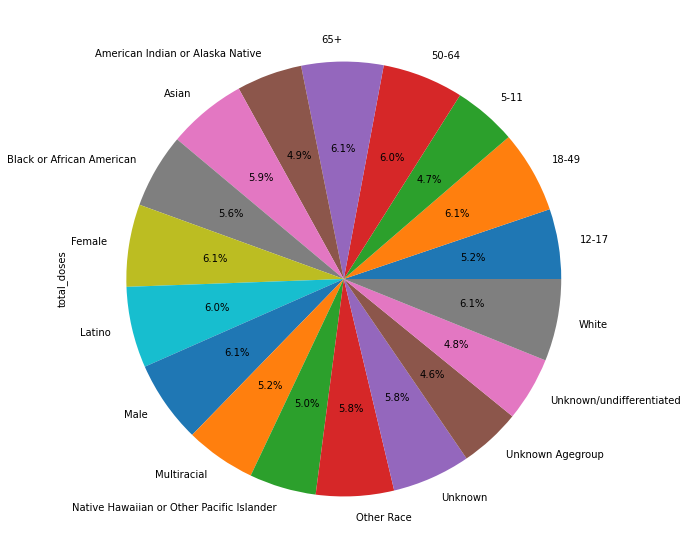

In [51]:
plt.figure(figsize = (15,10))
cva_df.groupby('demographic_value').count()['total_doses'].plot(kind = 'pie',autopct = '%1.1f%%')

#### Month with the most vaccines administered

<AxesSubplot:ylabel='total_doses'>

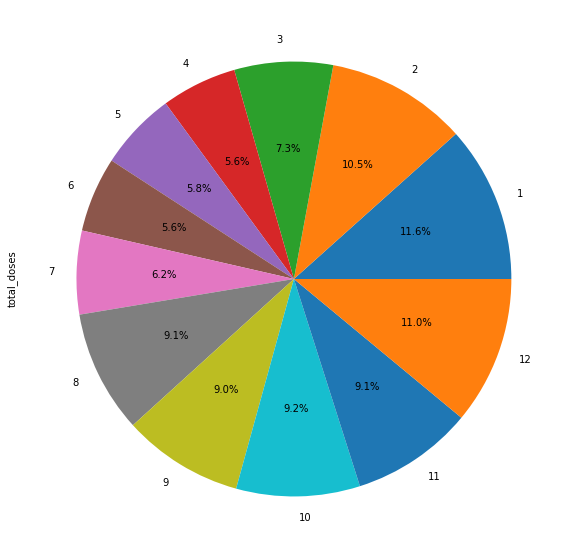

In [58]:
plt.figure(figsize = (15,10))
cva_df.groupby('Administered Month').count()['total_doses'].plot(kind = 'pie',autopct = '%1.1f%%')

#### Year with the most vaccine Administered

<AxesSubplot:ylabel='total_doses'>

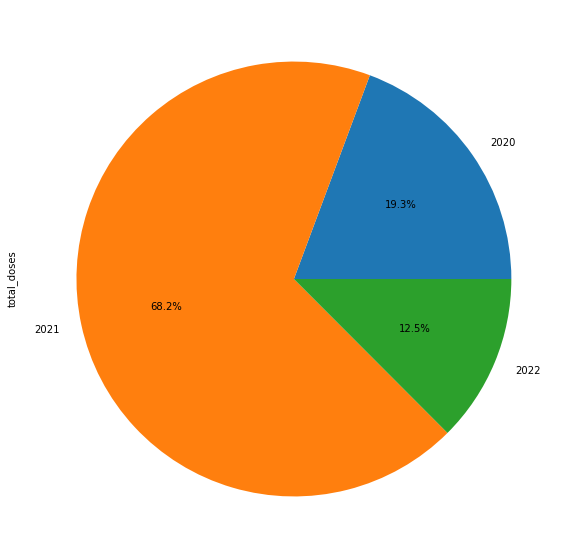

In [56]:
plt.figure(figsize = (15,10))
cva_df.groupby('Administered Year').count()['total_doses'].plot(kind = 'pie',autopct = '%1.1f%%')

In [60]:
cva_df.describe()

,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,booster_recip_count,cumulative_booster_recip_count,Administered Month,Administered Year
count,9617.000000,9.617000e+03,9617.000000,9.617000e+03,9617.000000,9.617000e+03,9617.000000,9.617000e+03,9617.000000,9.617000e+03,9617.000000,9.617000e+03,9617.000000,9.617000e+03,9617.000000,9.617000e+03,9617.000000,9617.000000
mean,22466.409171,5.663188e+06,12603.446085,3.180579e+06,8369.907352,2.225642e+06,713.057294,1.932654e+05,1099.341375,1.880443e+05,8705.362379,2.479070e+06,9804.703130,2.921109e+06,4440.437662,4.143819e+05,6.605802,2020.931995
std,40239.018225,8.652832e+06,21979.623773,4.899524e+06,17116.213987,3.407962e+06,2615.511508,3.228886e+05,1875.260515,3.239989e+05,19628.098112,3.809182e+06,21106.381558,4.287160e+06,13402.050745,1.218128e+06,3.754706,0.560181
min,1.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,2020.000000
25%,63.000000,6.375000e+03,39.000000,4.103000e+03,9.000000,2.001000e+03,0.000000,8.300000e+01,9.000000,1.081000e+03,12.000000,1.026000e+03,37.000000,4.550000e+03,0.000000,0.000000e+00,3.000000,2021.000000
50%,4861.000000,1.073129e+06,2655.000000,5.515580e+05,764.000000,2.080860e+05,17.000000,7.692000e+03,256.000000,2.337500e+04,1161.000000,3.952190e+05,1780.000000,6.060380e+05,0.000000,0.000000e+00,7.000000,2021.000000
75%,26059.000000,9.271711e+06,15361.000000,4.822982e+06,7268.000000,4.034515e+06,441.000000,2.206880e+05,1395.000000,2.337960e+05,7353.000000,4.178614e+06,8858.000000,4.969071e+06,518.000000,2.924700e+04,10.000000,2021.000000
max,321170.000000,3.788738e+07,197529.000000,2.146857e+07,127094.000000,1.416585e+07,47842.000000,1.301298e+06,14683.000000,1.766522e+06,181247.000000,1.451585e+07,206389.000000,1.627367e+07,110095.000000,7.736487e+06,12.000000,2022.000000


In [59]:
results = cva_df.groupby('demographic_value').sum()
results

,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,booster_recip_count,cumulative_booster_recip_count,Administered Month,Administered Year
demographic_value,,,,,,,,,,,,,,,,,,
12-17,5213509,1108195896,5192333,1103681419,10648,3009385,1299,366998,259772,41201945,2075192,456301797,2334961,550826479,570676,28674318,3218,1010499
18-49,33212597,8324551081,19574942,4843040316,12321983,3131060815,1301298,347010108,1766522,299952856,13112504,3698049455,14879026,4369469079,6120140,503624358,4031,1188259
5-11,2484587,195721817,38657,4102762,1696,478665,249,31471,225117,12959618,1120692,76789833,1345808,116978035,1258,60660,2736,915558
50-64,16332473,4272917581,8659419,2254162119,6919606,1808096207,738914,206727321,665935,122285440,6199910,1887243945,6865844,2189489376,3745822,352635170,3973,1172099
65+,14770183,4251217224,6934877,1990281979,7574521,2191142679,243663,65299006,603187,125352528,5396702,1828351892,5999889,2135918320,3796654,443383046,4014,1184219
American Indian or Alaska Native,234066,58519498,114174,28031847,103344,27597604,8691,2235887,16558,3029762,91772,25385064,108330,31287665,39985,3583320,2890,947878
Asian,12395381,3146446398,7162639,1844143910,4430319,1172677787,285631,83243904,411172,65312263,4597315,1365823585,5008487,1563702712,2956294,277134631,3833,1141799
Black or African American,3094373,745076173,1726741,410657372,1167010,297285684,121065,31209268,131980,21846425,1225397,330379838,1357377,388169769,600041,52970167,3541,1079179
Female,37887382,9625715400,21468569,5449004105,14165854,3796644556,1006525,277714401,1757826,299680871,14515846,4190247981,16273672,4920779890,7736487,722976322,4049,1190279


In [61]:
cva_df.groupby('demographic_value').mean()

,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,booster_recip_count,cumulative_booster_recip_count,Administered Month,Administered Year
demographic_value,,,,,,,,,,,,,,,,,,
12-17,10427.018000,2.216392e+06,10384.666000,2.207363e+06,21.296000,6.018770e+03,2.598000,733.996000,519.544000,82403.890000,4150.384000,9.126036e+05,4669.922000,1.101653e+06,1141.352000,5.734864e+04,6.436000,2020.998000
18-49,56484.008503,1.415740e+07,33290.717687,8.236463e+06,20955.753401,5.324933e+06,2213.091837,590153.244898,3004.289116,510123.904762,22300.176871,6.289200e+06,25304.465986,7.431070e+06,10408.401361,8.565040e+05,6.855442,2020.848639
5-11,5484.739514,4.320570e+05,85.335541,9.056870e+03,3.743929,1.056656e+03,0.549669,69.472406,496.947020,28608.428256,2473.933775,1.695140e+05,2970.878587,2.582297e+05,2.777042,1.339073e+02,6.039735,2021.099338
50-64,28159.436207,7.367099e+06,14930.032759,3.886486e+06,11930.355172,3.117407e+06,1273.989655,356426.415517,1148.163793,210836.965517,10689.500000,3.253869e+06,11837.662069,3.774982e+06,6458.313793,6.079917e+05,6.850000,2020.860345
65+,25205.090444,7.254637e+06,11834.261092,3.396386e+06,12925.803754,3.739151e+06,415.807167,111431.750853,1029.329352,213912.163823,9209.389078,3.120054e+06,10238.718430,3.644912e+06,6478.931741,7.566264e+05,6.849829,2020.851536
American Indian or Alaska Native,499.074627,1.247750e+05,243.441365,5.976940e+04,220.349680,5.884351e+04,18.530917,4767.349680,35.304904,6460.046908,195.675906,5.412594e+04,230.980810,6.671144e+04,85.255864,7.640341e+03,6.162047,2021.061834
Asian,21938.727434,5.568932e+06,12677.237168,3.263972e+06,7841.272566,2.075536e+06,505.541593,147334.343363,727.738053,115596.925664,8136.840708,2.417387e+06,8864.578761,2.767615e+06,5232.378761,4.905038e+05,6.784071,2020.883186
Black or African American,5794.705993,1.395274e+06,3233.597378,7.690213e+05,2185.411985,5.567148e+05,226.713483,58444.322097,247.153558,40910.908240,2294.750936,6.186888e+05,2541.904494,7.269097e+05,1123.672285,9.919507e+04,6.631086,2020.934457
Female,64324.926995,1.634247e+07,36449.183362,9.251280e+06,24050.685908,6.445916e+06,1708.870968,471501.529711,2984.424448,508796.045840,24644.899830,7.114173e+06,27629.324278,8.354465e+06,13134.952462,1.227464e+06,6.874363,2020.847199


### Summation of types of doses per demographic value

<AxesSubplot:ylabel='total_doses'>

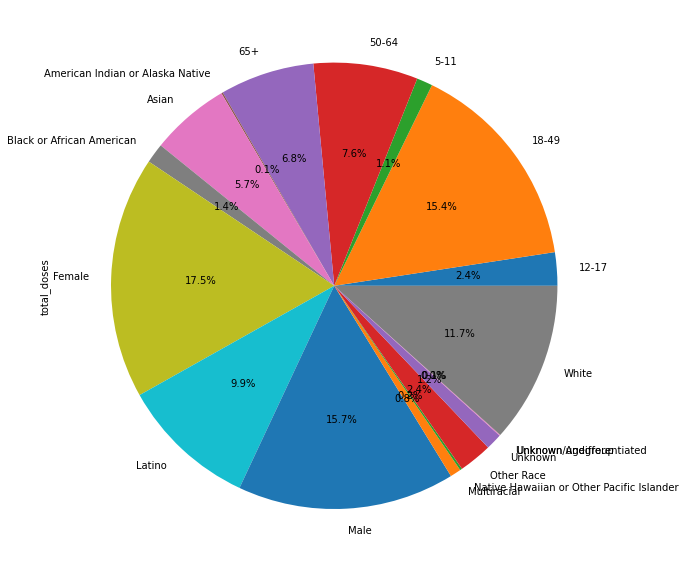

In [86]:
# TOTAL DOSE
plt.figure(figsize = (10,15))
cva_df.groupby('demographic_value').sum()['total_doses'].plot(kind = 'pie',autopct = '%1.1f%%')
# ,shadow = True,explode[0,0,0,0,0,0,0,0,0,0,0,0,0,0],startangle =180)

<AxesSubplot:ylabel='pfizer_doses'>

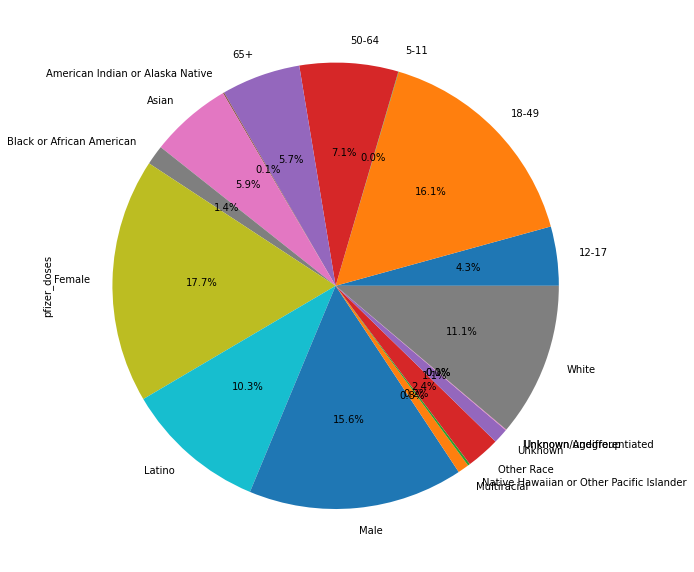

In [87]:
# PFIZER DOSE

plt.figure(figsize = (10,15))
cva_df.groupby('demographic_value').sum()['pfizer_doses'].plot(kind = 'pie',autopct = '%1.1f%%')

<AxesSubplot:ylabel='jj_doses'>

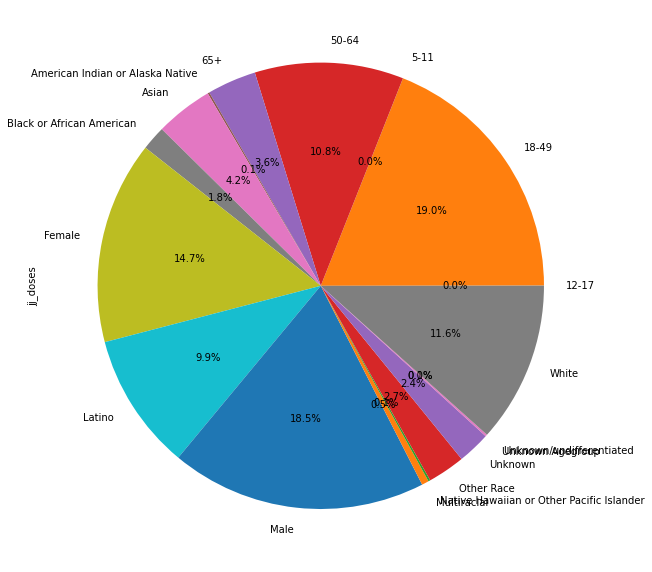

In [88]:
# JJ DOSE

plt.figure(figsize = (10,15))
cva_df.groupby('demographic_value').sum()['jj_doses'].plot(kind = 'pie',autopct = '%1.1f%%')

<AxesSubplot:ylabel='moderna_doses'>

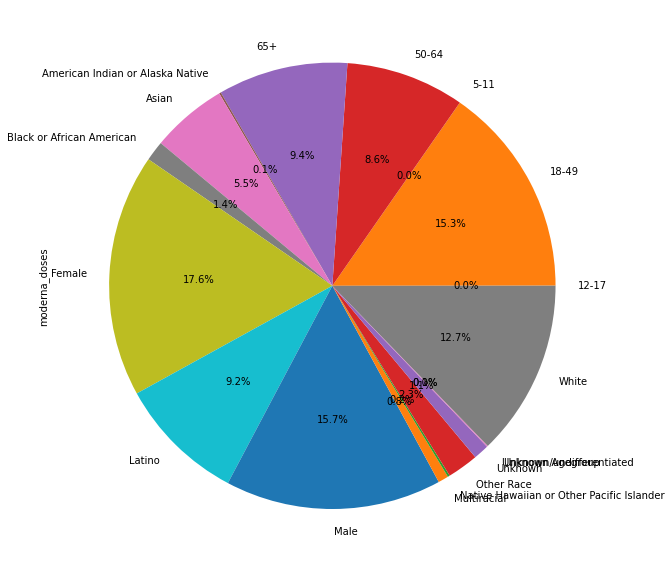

In [89]:
# MODERNA DOSE

plt.figure(figsize = (10,15))
cva_df.groupby('demographic_value').sum()['moderna_doses'].plot(kind = 'pie',autopct = '%1.1f%%')

### Summation of vaccination status

<AxesSubplot:ylabel='partially_vaccinated'>

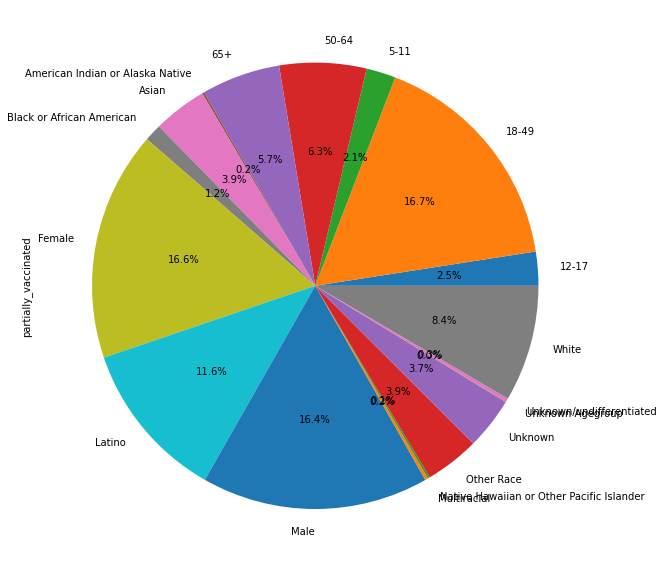

In [90]:
# PARTIALLY VACCINATED

plt.figure(figsize = (10,15))
cva_df.groupby('demographic_value').sum()['partially_vaccinated'].plot(kind = 'pie',autopct = '%1.1f%%')

<AxesSubplot:ylabel='fully_vaccinated'>

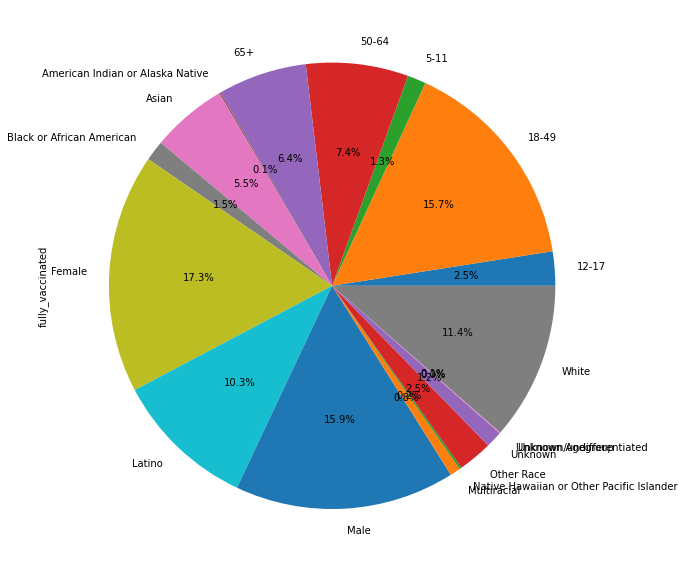

In [91]:
# FULLY VACVACCINATED 

plt.figure(figsize = (10,15))
cva_df.groupby('demographic_value').sum()['fully_vaccinated'].plot(kind = 'pie',autopct = '%1.1f%%')

<AxesSubplot:ylabel='at_least_one_dose'>

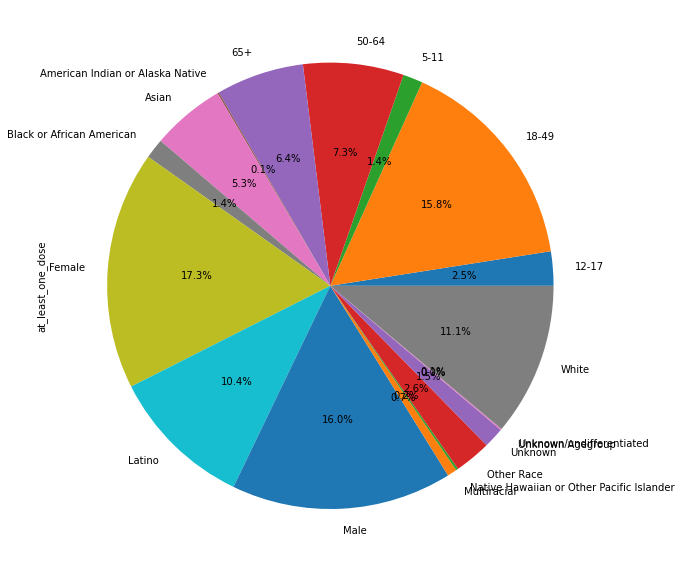

In [92]:
# AT LEAST ONE DOSE

plt.figure(figsize = (10,15))
cva_df.groupby('demographic_value').sum()['at_least_one_dose'].plot(kind = 'pie',autopct = '%1.1f%%')

<AxesSubplot:ylabel='booster_recip_count'>

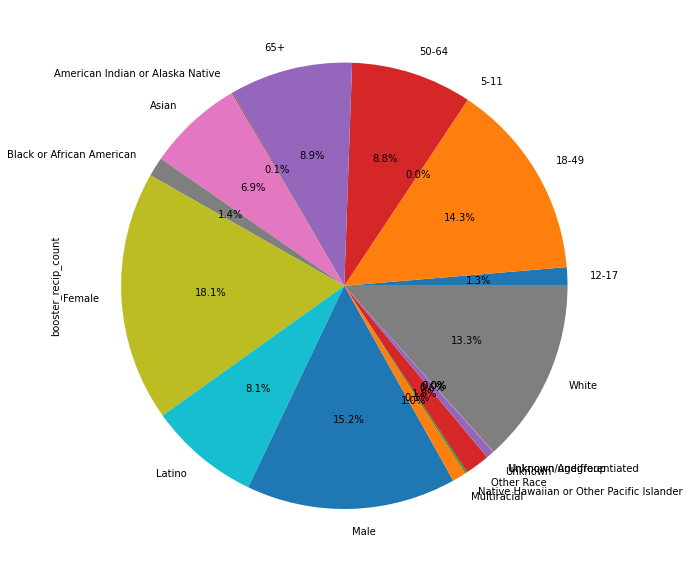

In [93]:
# BOOSTER RECIP COUNT

plt.figure(figsize = (10,15))
cva_df.groupby('demographic_value').sum()['booster_recip_count'].plot(kind = 'pie',autopct = '%1.1f%%')